In [1]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.action_chains import ActionChains
from selenium.webdriver.common.keys import Keys
from bs4 import BeautifulSoup
import time
import requests

In [22]:
driver = webdriver.Chrome() 
driver.get("https://medium.com/tag/health/archive")


scroll_pause_time = 2  
article_links = set()

final_links = []

while len(final_links) < 300:
    # url = "https://medium.com/tag/health/archive"

    # html_text = requests.get(url).text

    soup = BeautifulSoup(driver.page_source, 'html.parser')

    # main_div = soup.find_all("div", {"role": "link"})

    div = soup.find_all("div", {"data-href": True})

    # print(len(div))

    for article in div:
        # print(article['data-href'])
        article_links.add(article['data-href'])
        final_links.append(article['data-href'])
        
    driver.find_element(By.TAG_NAME, "body").send_keys(Keys.END)
    time.sleep(scroll_pause_time)
    
    if len(final_links) > 300:
        break
    

driver.quit()

all_articles = []

for link in final_links:
    html_text = requests.get(link).text
    soup = BeautifulSoup(html_text, 'html.parser')
    current_article = {}
    
    all_paragraphs = soup.find_all('p')
    for i in range(len(all_paragraphs)):
        all_paragraphs[i] = all_paragraphs[i].get_text(strip=True)
    final_para = ' '.join(all_paragraphs)
    article_title = soup.find('title').get_text(strip=True) if soup.find('title') else "No Title"
    para_text = soup.get_text(separator=' ', strip=True)
    # current_article = ' '.join([par.text for par in all_paragraphs])
    
    current_article['Title'] = article_title
    current_article['Text'] = final_para
    
    # current_article = "Title : " + article_title + '\n' + current_article
    all_articles.append(current_article)
    print(current_article)
    # with open ('articles.txt', 'a') as f:
    #     f.write(current_article)
    #     f.write('\n')
    # print(current_article)
    
    
    # all_uls = soup.find_all('ul')
    
    
    
    

{'Title': 'What does the rainwater taste like? | by Aleena Huda | Readers Club | Jan, 2025 | Medium', 'Text': 'Sign up Sign in Sign up Sign in Member-only story Aleena Huda Follow Readers Club -- 4 Share One evening, it showered outside. My mom grabbed a vessel to collect the rainwater. She ran to the terrace and placed it on the beam. The rain stopped within a few minutes. I eagerly went to take the vessel but ended in dismay. I thought half of the pot would have been filled. Only 5% of the pot has been filled. Anyhow, I couldn’t wait to taste it. I wondered why we hadn’t considered tasting the rainwater all these years. I thought drinking rainwater would catch cold for me. I also believed that it would be tasteless or neutral. With all curiosity, I had a sip. Wow… It was as sweet as the filtered water that we drank every day. It isn’t similar to that but possesses a unique taste. No water in the world tastes similar to rainwater. We install water purifiers at home to bring that taste

In [30]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
import re


In [31]:
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\SAKSHAM\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\SAKSHAM\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\SAKSHAM\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [25]:
stopwords = set(stopwords.words('english'))
porter = PorterStemmer()
lemmatizer = WordNetLemmatizer()

In [26]:
for article in all_articles:
    text = article['Text']
    text_list = text.split()
    title = article['Title']
    title_list = title.split()
    if title_list[-1] == 'medium':
        title_list = title_list[:-1]
    title = ' '.join(title_list)
    article['Title'] = title
    for i in range(len(text_list) - 1):
        if text_list[i] == 'Share':
            # print(i)
            text_list = text_list[i+1:]
            break
    
    # print(len(text_list))
    text = ' '.join(text_list)
    article['Text'] = text
    print(text) 

One evening, it showered outside. My mom grabbed a vessel to collect the rainwater. She ran to the terrace and placed it on the beam. The rain stopped within a few minutes. I eagerly went to take the vessel but ended in dismay. I thought half of the pot would have been filled. Only 5% of the pot has been filled. Anyhow, I couldn’t wait to taste it. I wondered why we hadn’t considered tasting the rainwater all these years. I thought drinking rainwater would catch cold for me. I also believed that it would be tasteless or neutral. With all curiosity, I had a sip. Wow… It was as sweet as the filtered water that we drank every day. It isn’t similar to that but possesses a unique taste. No water in the world tastes similar to rainwater. We install water purifiers at home to bring that taste. But, God has made it naturally without any water purifiers. His blessing has been instilled in the rainwater. I could drink only a very little as I had to share with my mom and aunt too. My aunt said th

In [48]:
import langdetect


In [56]:
for i in range(len(all_articles)):
    article = all_articles[i]
    text = article['Text']
    title = article['Title']
    
    detected_lang = langdetect.detect(text)
    if detected_lang != 'en':
        all_articles.remove(article)
        continue
    
    
    # text = text.lower()
    text = re.sub(r'[^\w\s.,!?;:()\'"-]', '', text) # Here we are retaining letters, digits, punctuation(for tokenization), and spaces
    text = re.sub(r'https?:\/\/.*[\r\n]*', '', text)  # Remove URLs
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = text.lower()  # Convert text to lowercaseA-Z\s]', '', title)
    title = re.sub(r'[^\w\s.,!?;:()\'"-]', '', title)
    title = re.sub(r'https?:\/\/.*[\r\n]*', '', title) 
    title = re.sub(r'\d+', '', title) 
    title = title.lower()
    text = re.sub(r'\s+', ' ', text)  # Replacing multiple spaces with single space
    title = re.sub(r'\s+', ' ', title)  # Replacing multiple spaces with single space
    text = text.strip()
    text = text.encode('ascii', 'ignore').decode()
    title = title.strip()
    article['Text'] = text
    article['Title'] = title
    
    all_articles[i] = article
    
    
    

In [58]:
## Putting in a csv file
import csv

with open('articles.csv', 'w', encoding='utf-8') as f:
    writer = csv.DictWriter(f, fieldnames = ['Title', 'Text'])
    writer.writeheader()
    try:
        for article in all_articles:
            writer.writerow(article)
    except Exception as e:
        print(article)
        print(e)
    # for article in all_articles:
    #     writer.writerow(article)

## Reading from the csv file

import pandas as pd

df = pd.read_csv('articles.csv')
print(df.head())

                                               Title  \
0  what does the rainwater taste like? by aleena ...   
1  the power of anti-aging strategies: slow down ...   
2  actually self realisation .a great life guide ...   
3  ways on how to take care of your womans emotio...   
4  orthopedic surgeon in chennai - medicalseo - m...   

                                                Text  
0  one evening, it showered outside. my mom grabb...  
1  aging gracefully isnt a dreamits a commitment ...  
2  hello friends today raman maharshi is talking ...  
3  . when she is venting, allow her to speak. it ...  
4  anorthopedic surgeonis a medical specialist fo...  


In [74]:
stopwords = set(stopwords.words('english'))
ps = PorterStemmer()
lemmatizer = WordNetLemmatizer()

AttributeError: 'set' object has no attribute 'words'

In [75]:
texts = df['Text']
all_text = ''
freq_dict = {}
for i in range(len(texts)):
    text = texts[i]
    words = word_tokenize(text)
    words = [word for word in words if word not in stopwords]
    sentences = sent_tokenize(text)
    sentences = [sentence for sentence in sentences if len(sentence) > 1]
    words = [word for word in words if len(word) > 1]
    words = [ps.stem(word) for word in words]
    words = [lemmatizer.lemmatize(word) for word in words]
    
    for word in words:
        if word in freq_dict:
            freq_dict[word] += 1
        else:
            freq_dict[word] = 1
    
    all_text += ' '.join(words)
    all_text += ' '
    
    
    
    

In [76]:
freq_dict = {k: v for k, v in sorted(freq_dict.items(), key=lambda item: item[1], reverse=True)}

In [77]:
print(freq_dict)

{'--': 619, 'health': 584, 'help': 559, 'like': 402, 'peopl': 372, 'one': 352, 'team': 331, 'blog': 328, 'career': 326, 'press': 322, 'day': 320, 'make': 315, 'text': 313, 'term': 311, 'time': 307, 'privaci': 305, 'statu': 304, 'speech': 303, 'get': 279, 'life': 261, 'year': 256, 'also': 226, 'feel': 224, 'even': 222, 'work': 219, 'age': 216, 'use': 214, 'way': 206, 'live': 201, 'ai': 201, 'u': 198, 'take': 193, 'need': 192, 'thing': 186, 'cancer': 185, 'chang': 184, 'diseas': 184, 'bodi': 182, 'world': 179, 'experi': 179, 'creat': 172, 'dont': 172, 'well': 167, 'everi': 165, 'would': 163, 'mani': 157, 'first': 148, 'know': 147, 'good': 147, 'may': 147, 'new': 144, 'human': 143, 'public': 142, 'often': 139, 'run': 139, 'improv': 138, 'today': 137, 'still': 137, 'fire': 135, 'want': 131, 'go': 131, 'healthi': 131, 'share': 130, 'much': 130, 'start': 128, 'read': 128, 'person': 128, 'caus': 128, 'becom': 127, 'stand': 127, 'could': 126, 'food': 126, 'natur': 124, 'http': 124, 'find': 123

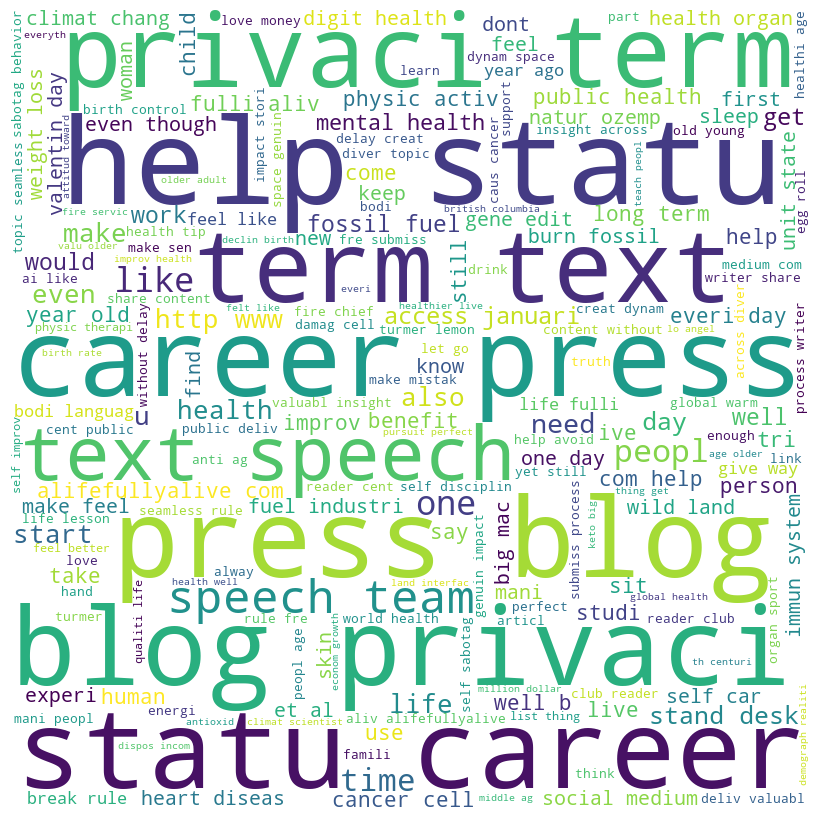

In [78]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(all_text)

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

In [68]:
print(freq_dict)

{'one': 352, 'even': 222, 'shower': 10, 'outsid': 36, 'mom': 12, 'grab': 15, 'vessel': 12, 'collect': 10, 'rainwat': 36, 'ran': 6, 'terrac': 6, 'place': 78, 'beam': 6, 'rain': 11, 'stop': 72, 'within': 86, 'minut': 41, 'eagerli': 6, 'went': 27, 'take': 193, 'end': 52, 'dismay': 6, 'thought': 90, 'half': 36, 'pot': 12, 'would': 163, 'fill': 21, 'anyhow': 6, 'couldnt': 43, 'wait': 69, 'tast': 69, 'wonder': 40, 'hadnt': 8, 'consid': 54, 'year': 256, 'drink': 101, 'catch': 34, 'cold': 33, 'also': 226, 'believ': 73, 'tasteless': 6, 'neutral': 6, 'curio': 13, 'sip': 7, 'wow': 8, 'sweet': 26, 'filter': 6, 'water': 92, 'drank': 7, 'everi': 165, 'day': 320, 'isnt': 81, 'similar': 39, 'possess': 6, 'uniqu': 22, 'world': 179, 'instal': 10, 'purifi': 12, 'home': 81, 'bring': 29, 'god': 22, 'made': 94, 'natur': 124, 'without': 119, 'bless': 9, 'instil': 6, 'could': 126, 'littl': 33, 'share': 130, 'aunt': 16, 'said': 61, 'neighbour': 6, 'cook': 42, 'food': 126, 'spike': 9, 'high': 64, 'give': 100, '

In [69]:
{k: v for k, v in sorted(freq_dict.items(), key=lambda item: item[1], reverse = True)}

{'--': 619,
 'health': 584,
 'help': 559,
 'like': 402,
 'peopl': 372,
 'one': 352,
 'team': 331,
 'blog': 328,
 'career': 326,
 'press': 322,
 'day': 320,
 'make': 315,
 'text': 313,
 'term': 311,
 'time': 307,
 'privaci': 305,
 'statu': 304,
 'speech': 303,
 'get': 279,
 'life': 261,
 'year': 256,
 'also': 226,
 'feel': 224,
 'even': 222,
 'work': 219,
 'age': 216,
 'use': 214,
 'way': 206,
 'live': 201,
 'ai': 201,
 'u': 198,
 'take': 193,
 'need': 192,
 'thing': 186,
 'cancer': 185,
 'chang': 184,
 'diseas': 184,
 'bodi': 182,
 'world': 179,
 'experi': 179,
 'creat': 172,
 'dont': 172,
 'well': 167,
 'everi': 165,
 'would': 163,
 'mani': 157,
 'first': 148,
 'know': 147,
 'good': 147,
 'may': 147,
 'new': 144,
 'human': 143,
 'public': 142,
 'often': 139,
 'run': 139,
 'improv': 138,
 'today': 137,
 'still': 137,
 'fire': 135,
 'want': 131,
 'go': 131,
 'healthi': 131,
 'share': 130,
 'much': 130,
 'start': 128,
 'read': 128,
 'person': 128,
 'caus': 128,
 'becom': 127,
 'stand': 1

In [81]:
for key in list(freq_dict.keys()):
    if not (len(key) > 1 and key.isalpha()):
        freq_dict.pop(key)

        

('health', 'help', 'like', 'peopl', 'one', 'team', 'blog', 'career', 'press', 'day', 'make', 'text', 'term', 'time', 'privaci', 'statu', 'speech', 'get', 'life', 'year')


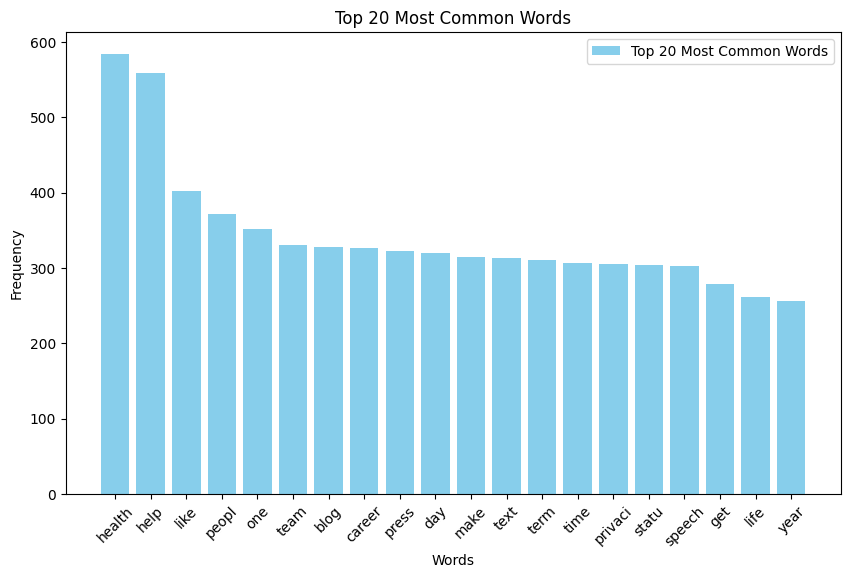

5.516792803468986
4814
0.06482803199655256


In [82]:
plt.figure(figsize=(10, 6))
top_words, top_counts = zip(*freq_dict.items())
print(top_words[:20])
plt.bar(top_words[:20], top_counts[:20], color='skyblue')

plt.xticks(rotation=45)
plt.legend(['Top 20 Most Common Words'])
plt.title('Top 20 Most Common Words')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

all_words = all_text.split()

average_word_length = sum(len(word) for word in all_words) / len(all_words)
unique_words = len(set(all_words))
lexical_diversity = unique_words / len(all_words)


# average_word_length = sum(len(word) for word in words) / len(words)
# unique_words = len(set(words))
# lexical_diversity = unique_words / len(words)

print(average_word_length)
print(unique_words)
print(lexical_diversity)

In [62]:
print(len(df['Text']))

301


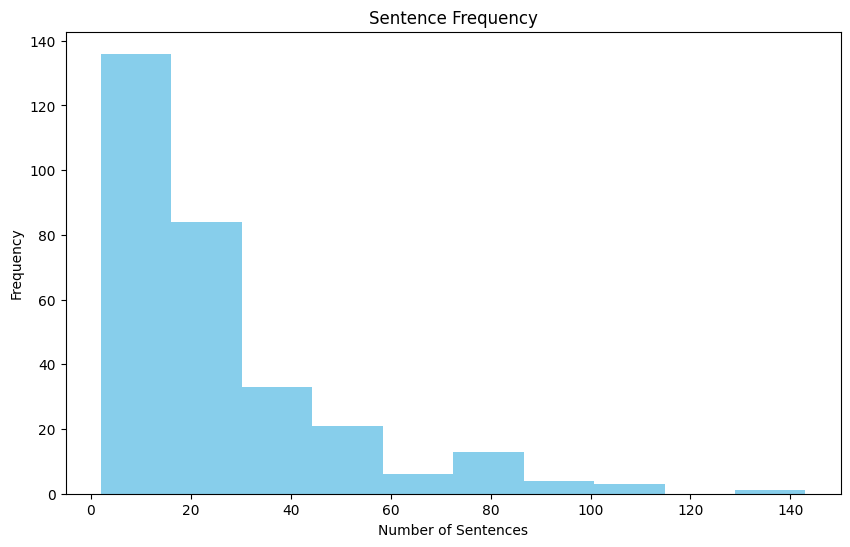

In [83]:
sentence_freq = []
text = df['Text']
for i in range(len(text)):
    sentence_freq.append(len(sent_tokenize(text[i])))
    sentence_freq[i] = sentence_freq[i] if sentence_freq[i] > 0 else 1
    

plt.figure(figsize=(10, 6))
plt.hist(sentence_freq, bins=10, color='skyblue')
plt.title('Sentence Frequency')
plt.xlabel('Number of Sentences')
plt.ylabel('Frequency')
plt.show()    

In [41]:
print(sentence_freq)

[26, 13, 6, 25, 7, 81]
